# Lead Scoring Case Study

Company named X Education sells online courses to industry professionals. X Education wants to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. 

### Objective: 
1. To build a model wherein we need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. 
2. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

### Step 1: Importing the Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas, NumPy, matplot, seaborn, SKlearn libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [3]:
# Importing the dataset
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the Dataframe

In [4]:
# Let's look at the dimensions of the dataframe
df.shape

(9240, 37)

Original DF has 9240 rows and 37 columns

In [5]:
# let's look at the statistics of the dataframe
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Lets Check for duplicate rows
print(df.duplicated().sum())

0


No Duplicate rows in original df

In [7]:
# Lets check number of unique values in each column
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

There are Nulls in original df

In [8]:
# Let's see the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
# Lets Check the % of missing values in each column
round(100*df.isnull().sum()/df.shape[0],2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

There are few columns with missing/null values in the dataframe, lets tackle them in our next step of data preparation. Basically, in nutshell we have to do:

a) Treating "Select" values as mentioned in problem statement

b) Dropping columns that have significantly high 40% missing values

c) Null/Missing values treatment

### Step 3: Data Cleaning

a) In the problem statement, it is particularly highlighted that few categorical columns have "Select" as values which is equivalent to Nulls. Looks like while filling form on website certain columns which are not mandatory are not selected by customer from the list and hence "Select" appears which must be default entry in the list. So lets treat them first hand.

In [10]:
# lets create a List of columns having 'Select' as a value:
cols_with_select = [col for col in df.columns if len(df[col].isin(['Select']).unique())>1]
print(cols_with_select)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


These 4 columns 'Specialization', 'How did you hear about X Education', 'Lead Profile', 'City' have Select values i.e. null values. So lets replace them with Nan

In [11]:
df= df.replace("Select", np.nan)

In [12]:
## Verifying if "Select" values are treated propoerly..
cols_with_select2 = [col for col in df.columns if len(df[col].isin(['Select']).unique())>1]
print(cols_with_select2)

[]


In [13]:
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

There are few columns with only unique value which does not yeild anything in our analysis, so lets drop them.

In [14]:
df = df.drop(["I agree to pay the amount through cheque", "Update me on Supply Chain Content", "Get updates on DM Content","Receive More Updates About Our Courses", "Magazine"], axis=1)
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,Interested in other courses,Low in Relevance,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,Ringing,NaN,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,Ringing,Not Sure,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,Will revert after reading the email,Might be,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,Will revert after reading the email,High in Relevance,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,wrong number given,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,invalid number,Not Sure,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,NaN,NaN,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,SMS Sent


b) Dropping columns that have significantly high 40% missing values:

In [15]:
# Lets look at Null %
round(100*df.isnull().sum()/df.shape[0],2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

Since there are missing values in many columns, we will remove columns with >40% missing values

In [16]:
df = df.drop(["How did you hear about X Education","Lead Quality","Lead Profile","Asymmetrique Activity Index",
              "Asymmetrique Profile Index", "Asymmetrique Activity Score","Asymmetrique Profile Score"],axis=1)
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,No,No,No,Interested in other courses,NaN,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,No,No,No,No,No,Ringing,NaN,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,No,No,No,No,No,wrong number given,Mumbai,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,No,No,No,No,No,invalid number,Mumbai,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,No,No,No,No,No,NaN,Other Metro Cities,No,SMS Sent


In [17]:
#Relooking at null percentages:
round(100*df.isnull().sum()/df.shape[0],2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

c) Null values treatment:

Handling Null values for columns which are <40%, since imputation will help us in retaining the corresponding data which would help in our model buidling. If these columns are found irrelvant during model training, we may further drop it, but not at this stage

In [18]:
# City column has ~40% Nulls.. lets look at this value_counts:
df["City"].value_counts(normalize =True)*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

In [19]:
# Lets impute Nulls with the mode of this variable. i.e Mumbai
df["City"] = df["City"].replace(np.nan, "Mumbai")

In [20]:
# Similarly Tags column has ~37% Nulls.. lets look at this value_counts:
df["Tags"].value_counts(normalize =True)*100

Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

In [21]:
# Lets impute it with mode value i.e "Will revert after reading the email"
df["Tags"] = df["Tags"].replace(np.nan, "Will revert after reading the email")
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,No,No,No,Interested in other courses,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,No,No,No,No,No,Ringing,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,No,No,No,No,No,wrong number given,Mumbai,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,No,No,No,No,No,invalid number,Mumbai,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,No,No,No,No,No,Will revert after reading the email,Other Metro Cities,No,SMS Sent


In [22]:
#Column named 'What matters most to you in choosing a course' has 29% Nulls"
df["What matters most to you in choosing a course"].value_counts(normalize =True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

In [23]:
df["What matters most to you in choosing a course"] = df["What matters most to you in choosing a course"].replace(np.nan, "Better Career Prospects")

In [24]:
#Other column "What is your current occupation" has 29% Nulls:
df["What is your current occupation"].value_counts(normalize =True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [25]:
# Imputing with its mode value:
df["What is your current occupation"] = df["What is your current occupation"].replace(np.nan, "Unemployed")          

In [26]:
# One more column "What is your current occupation" has 29% Nulls:
df["Specialization"].value_counts(normalize =True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

Since the value_counts of Specialization is does not show a clear mode and importantly few customers may keep it unfilled owing to unawareness on selecting the specialization. So its better to put it in miscellaneous category of Others.

In [27]:
df["Specialization"] = df["Specialization"].replace(np.nan, "Others")

In [28]:
# Last significantly Nulled column "Country" has 27% missing values:
df["Country"].value_counts(normalize =True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

In [29]:
# Imputing with its mode value:
df["Country"] = df["Country"].replace(np.nan, "India")

In [30]:
# Dropping rows with missing values which are ~2% or less, so its safe to discard
df.dropna(inplace = True)

In [31]:
round(100*df.isnull().sum()/df.shape[0],2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

So we have dealt with missing values completely.

In [32]:
# Before beginning with the EDA, lets see categorical and numerical columns in df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

In [33]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [34]:
num_cols = df.select_dtypes(exclude='object').columns
num_cols

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

### Step 4: Exploratory Data Analysis:

### Univariate Analysis

In [35]:
# Lets look at the Target variable "Converted" to see if there is any imbalance in original Dataframe:

In [36]:
df["Converted"].value_counts(normalize = True)*100

0    62.144589
1    37.855411
Name: Converted, dtype: float64

There is good representation of both the classes of data and hence we can further in our analysis
Converted value of 1 indicates the leads which are converted. Therefore there is ~38% lead conversion rate. 

In [37]:
# Lets plot numerical variables to check for outliers, if any:

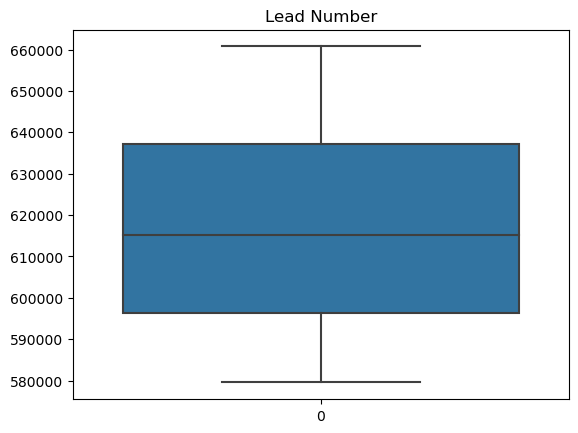

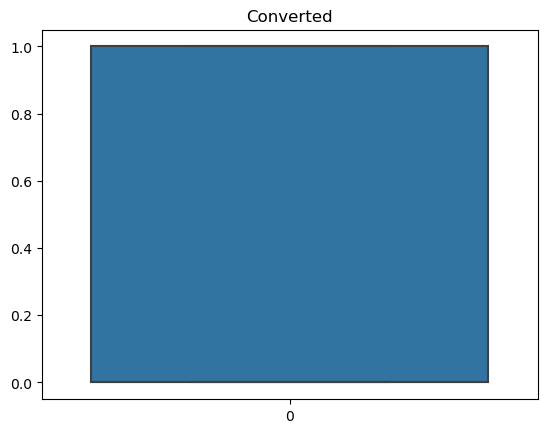

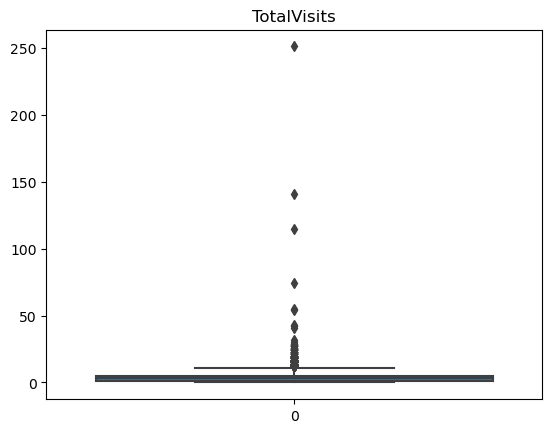

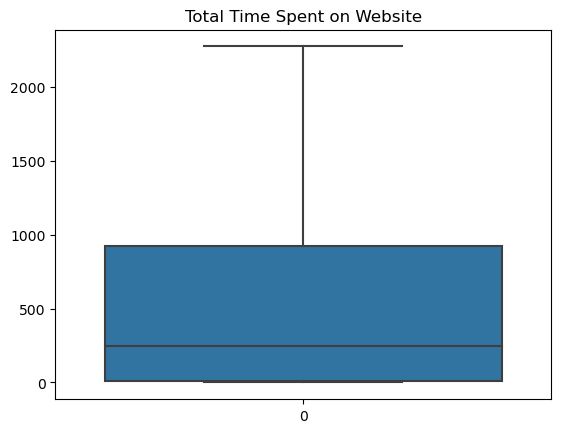

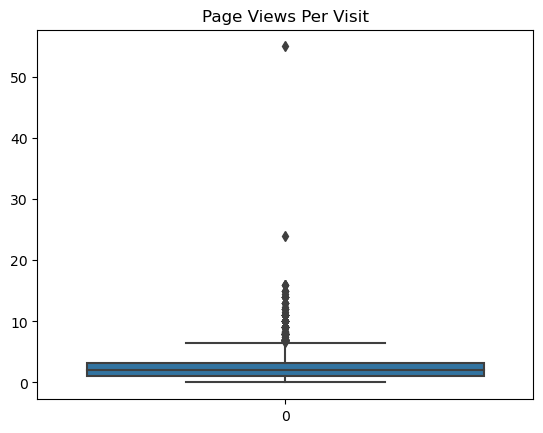

In [38]:
for i in num_cols:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

### Outliers Treatment:
As can be seen in above chart, "TotalVisits" and "Page Views Per Visit" have outliers. Now lets treat them

In [39]:
# We will cap the outliers at lower end to 5 percentile and outliers at higher end at 95 percentile:
percentiles = df['TotalVisits'].quantile([0.05,0.95]).values
df['TotalVisits'][df['TotalVisits'] <= percentiles[0]] = percentiles[0]
df['TotalVisits'][df['TotalVisits'] >= percentiles[1]] = percentiles[1]

In [40]:
percentiles2 = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles2[0]] = percentiles2[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles2[1]] = percentiles2[1]

### Bivariate Analysis

To begin with Bi-variate analysis of Categorical variables, lets 1st filter out variables for analysis. Looking at data dictionary, prospect ID can be excluded at this stage since its an unique for customer.

In [41]:
cat_cols=cat_cols.tolist()
cat_cols.remove('Prospect ID')

Similarly for Lead Source column data contains double entry and few categories are significantly low in % which can be bucketed in Other category. Last Activity also needs similar bucketing.

In [42]:
# replacing google with Google
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')
# bucketing smaller ones in Others:
df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

In [43]:
# bucketing smaller ones in Others:
df['Last Activity'] = df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
'Visited Booth in Tradeshow', 'Approached upfront','Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Others')

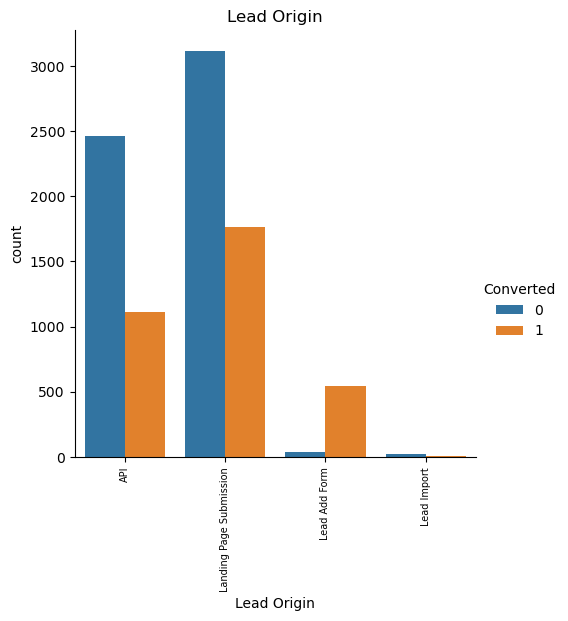

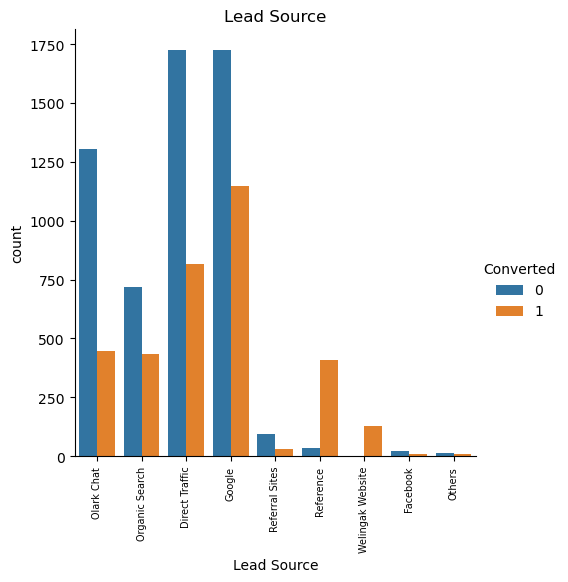

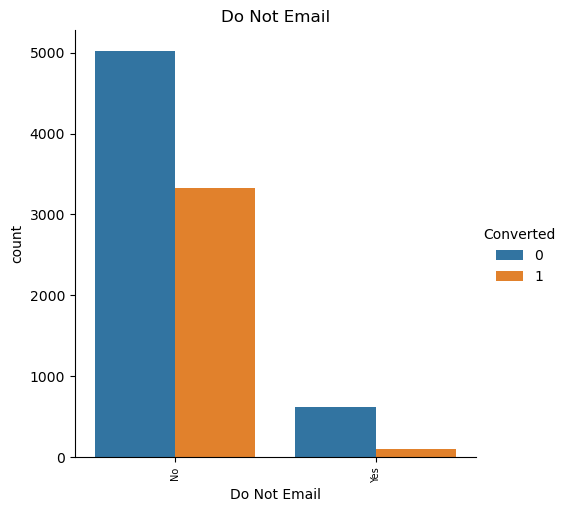

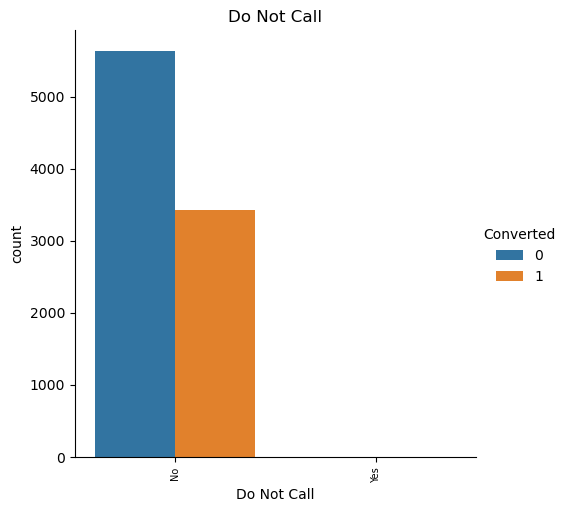

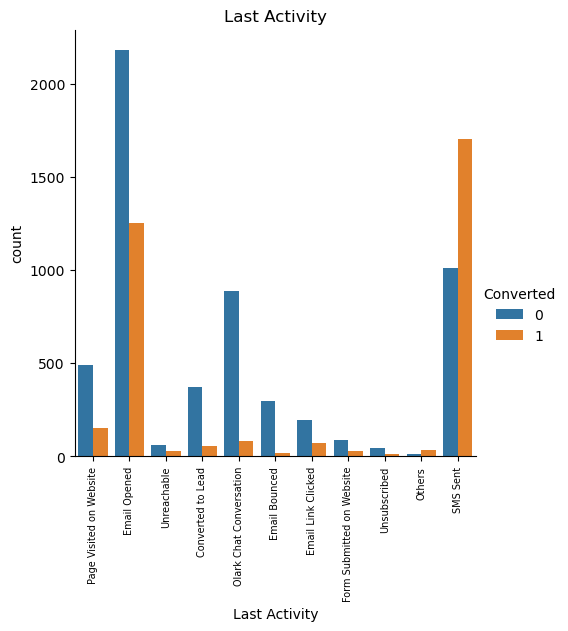

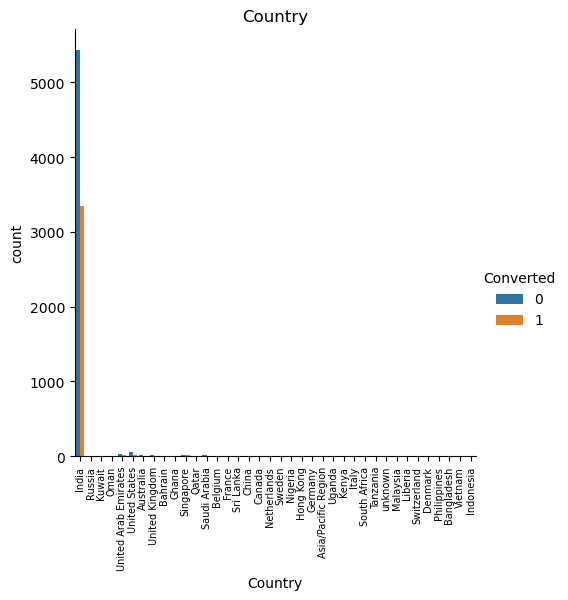

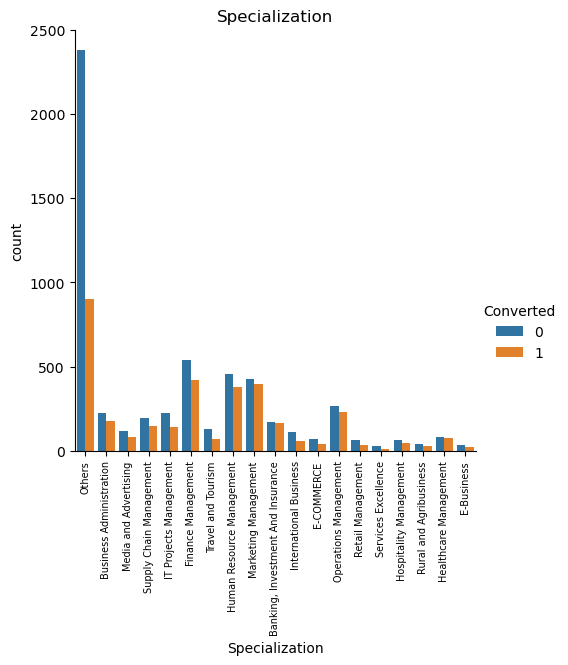

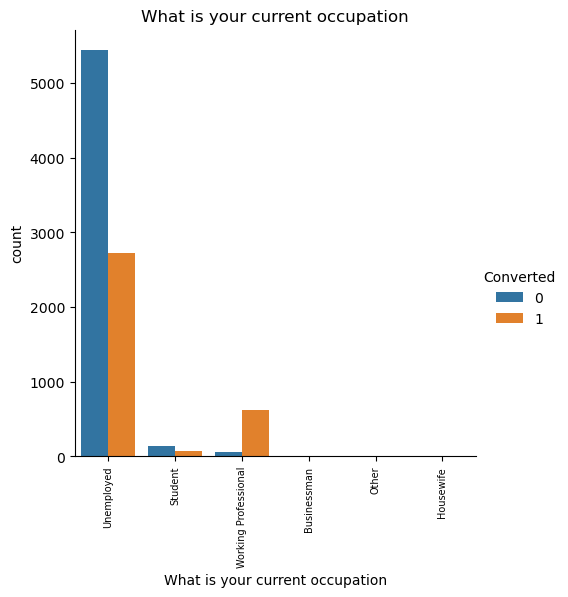

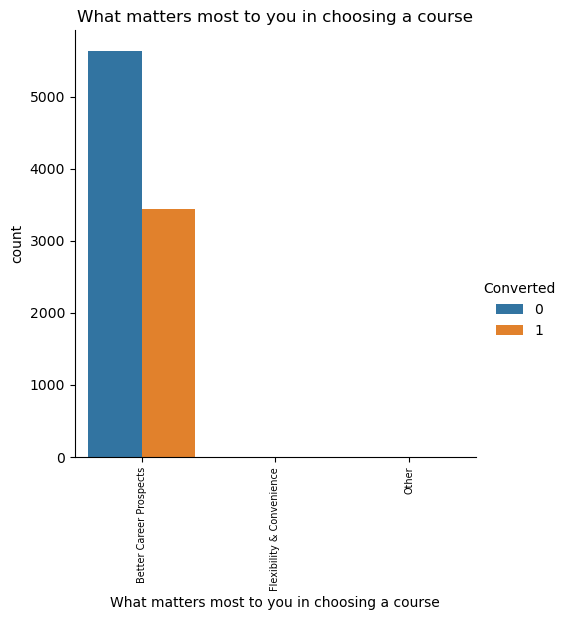

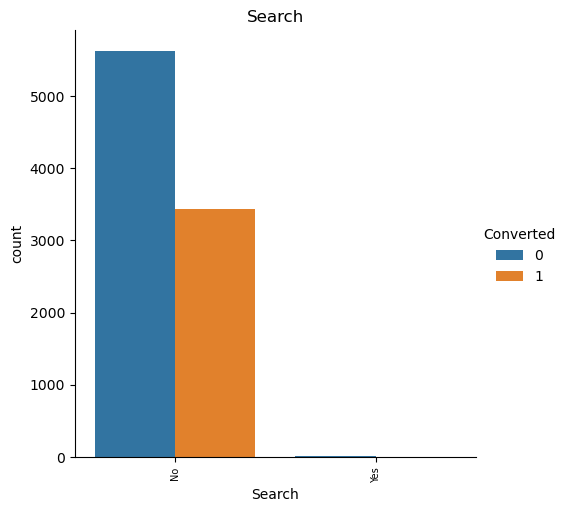

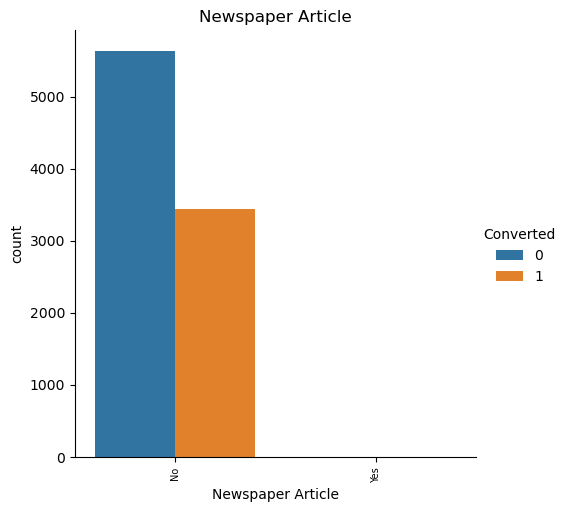

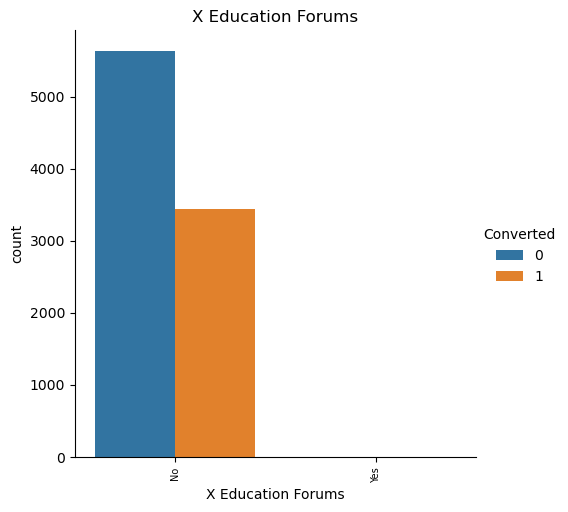

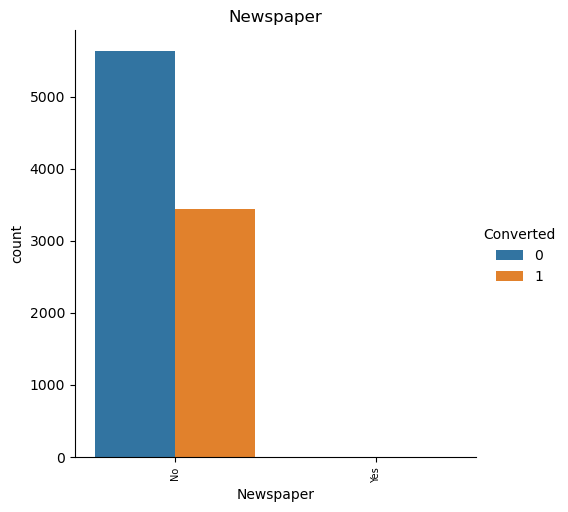

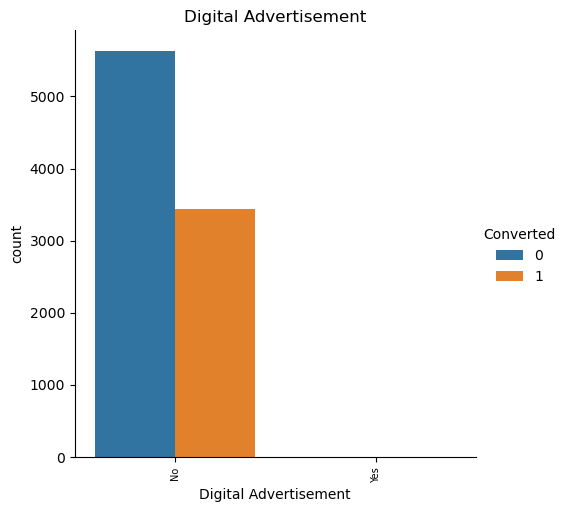

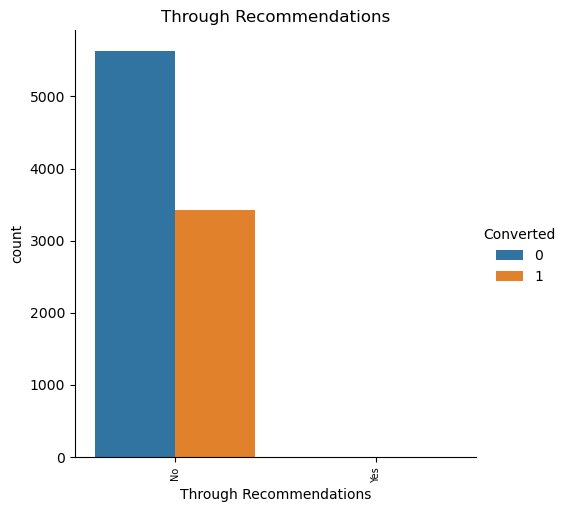

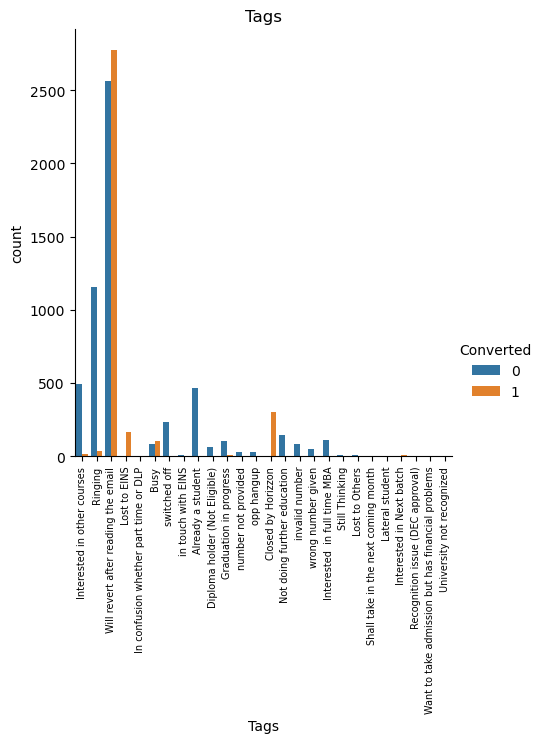

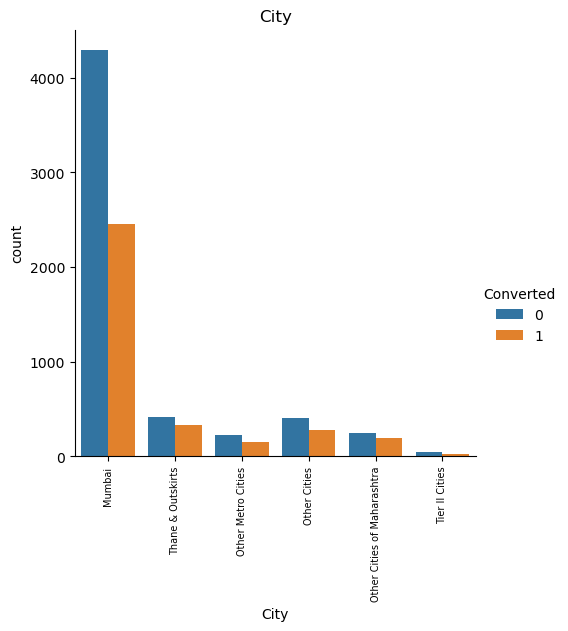

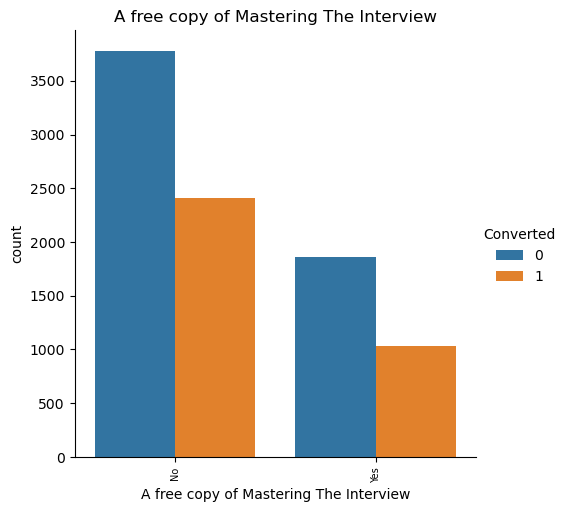

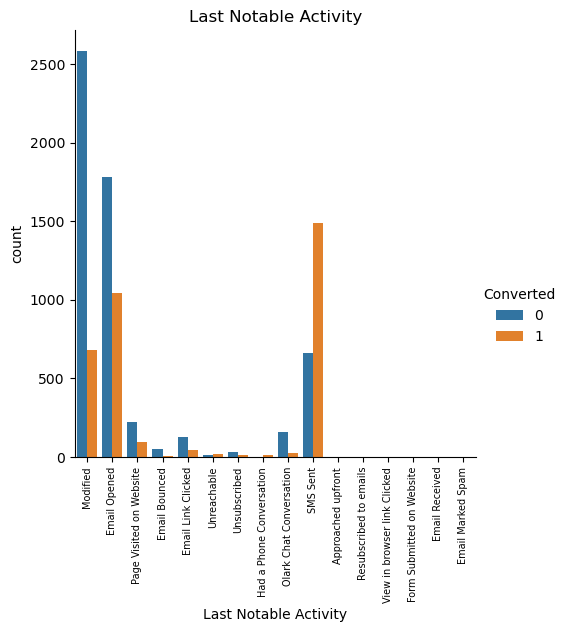

In [44]:
for i in cat_cols:
    sns.catplot(x = i , hue = "Converted", data = df, kind = "count").set_xticklabels(rotation=90, size=7)
    plt.title(i)
    plt.show()

Above chart depicts:
1. Lead Origin: API and Landing Page Submission generates the maximum leads, however conversion % is roughly 30%. Lead Add form though less number of leads but has significantly higher 90% Conversions. Lead import is very less in number and % too.
2. Lead Count: Google and Direct traffic generates maximum number of leads however Conversion Rate of reference leads and leads through welingak website is high.
3. Do not Email, Do not call, Search, Newspaper Article, X Education Forums,Digital Advertisement and Through Recommendation: Most of cases are pertaining to No. 
4. Last Activity: Last activity of the most of the leads is Email opened. Conversion rate for leads with last activity as SMS Sent is almost 60%
5. Country: Most of leads and conversion also is from India.
6. Current Occupation: Working professionals contribute to max Conversion %. Unemployed leads are the most in numbers however has around 30 conversion %.
7. Whats matters to choose a course: Customers joining for Better Career prospects are high in number and % too
8. City: Most number of leads and conversion % are from Mumbai

Inference: 
To increase overall lead conversion %,
1. Lead Origin: focus should be on improving lead converion of API and Landing Page Submission and generate more number of leads from Lead Add Form.
2. Lead Count: generate more number of leads from reference and welingak website and work towards increasing converion of lead from olark chat, organic search, direct traffic, and google leads
3. Do not Email, Do not call, Search, Newspaper Article, X Education Forums, Digital Advertisement and Through Recommendation: No inference
4. Last Activity: Continue to connect through SMS
5. Country and City: No inference
6. Current Occupation: Continue to pitch to working professionals. Work towards improving %Leads for unemployed leads.
7. Whats matters to choose a course: Career team should harness this possibilty and work towards making such proposition more lucrative

EDA finding suggest that few columns (with No as values) can be dropped since it will not help in our analysis. Lets drop them.

In [45]:
df = df.drop(['Lead Number','Tags','Country','Search','Newspaper Article','X Education Forums',
    'Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview'],axis=1)

In [46]:
df

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Others,Unemployed,Better Career Prospects,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,Others,Unemployed,Better Career Prospects,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Better Career Prospects,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,Others,Unemployed,Better Career Prospects,Mumbai,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Others,IT Projects Management,Unemployed,Better Career Prospects,Mumbai,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,Better Career Prospects,Mumbai,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,Unemployed,Better Career Prospects,Other Metro Cities,SMS Sent


### Step 5: Data Preparation

Lets now do the Encoding of Categorical variables:

In [47]:
#Converting some binary variables (Yes/No) to 1/0:
cat_var = ["Do Not Email", "Do Not Call"]

def mapping(x):
    return x.map({'Yes': 1, "No": 0})

df[cat_var] = df[cat_var].apply(mapping)

Lets now do the Dummy variables creation of Categorical variables:

In [48]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [49]:
# Concatenating the dummy_data to the df dataframe
df = pd.concat([df, dummy_data], axis=1)
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


Dropping the columns for which dummies were created

In [50]:
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation', 
              'What matters most to you in choosing a course','City','Last Notable Activity'], axis = 1)

In [51]:
df.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### Step 6: Train Test Split:

In [52]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [53]:
# Putting target variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [54]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Scaling the features

In [55]:
# Scale the three numeric features
scaler = MinMaxScaler()

In [56]:
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,0.2,0.178347,0.333333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,0.2,0.085355,0.333333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,0.0,0.000000,0.000000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,0.2,0.619946,0.333333,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.5,0.711590,0.416667,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Checking Correlation:

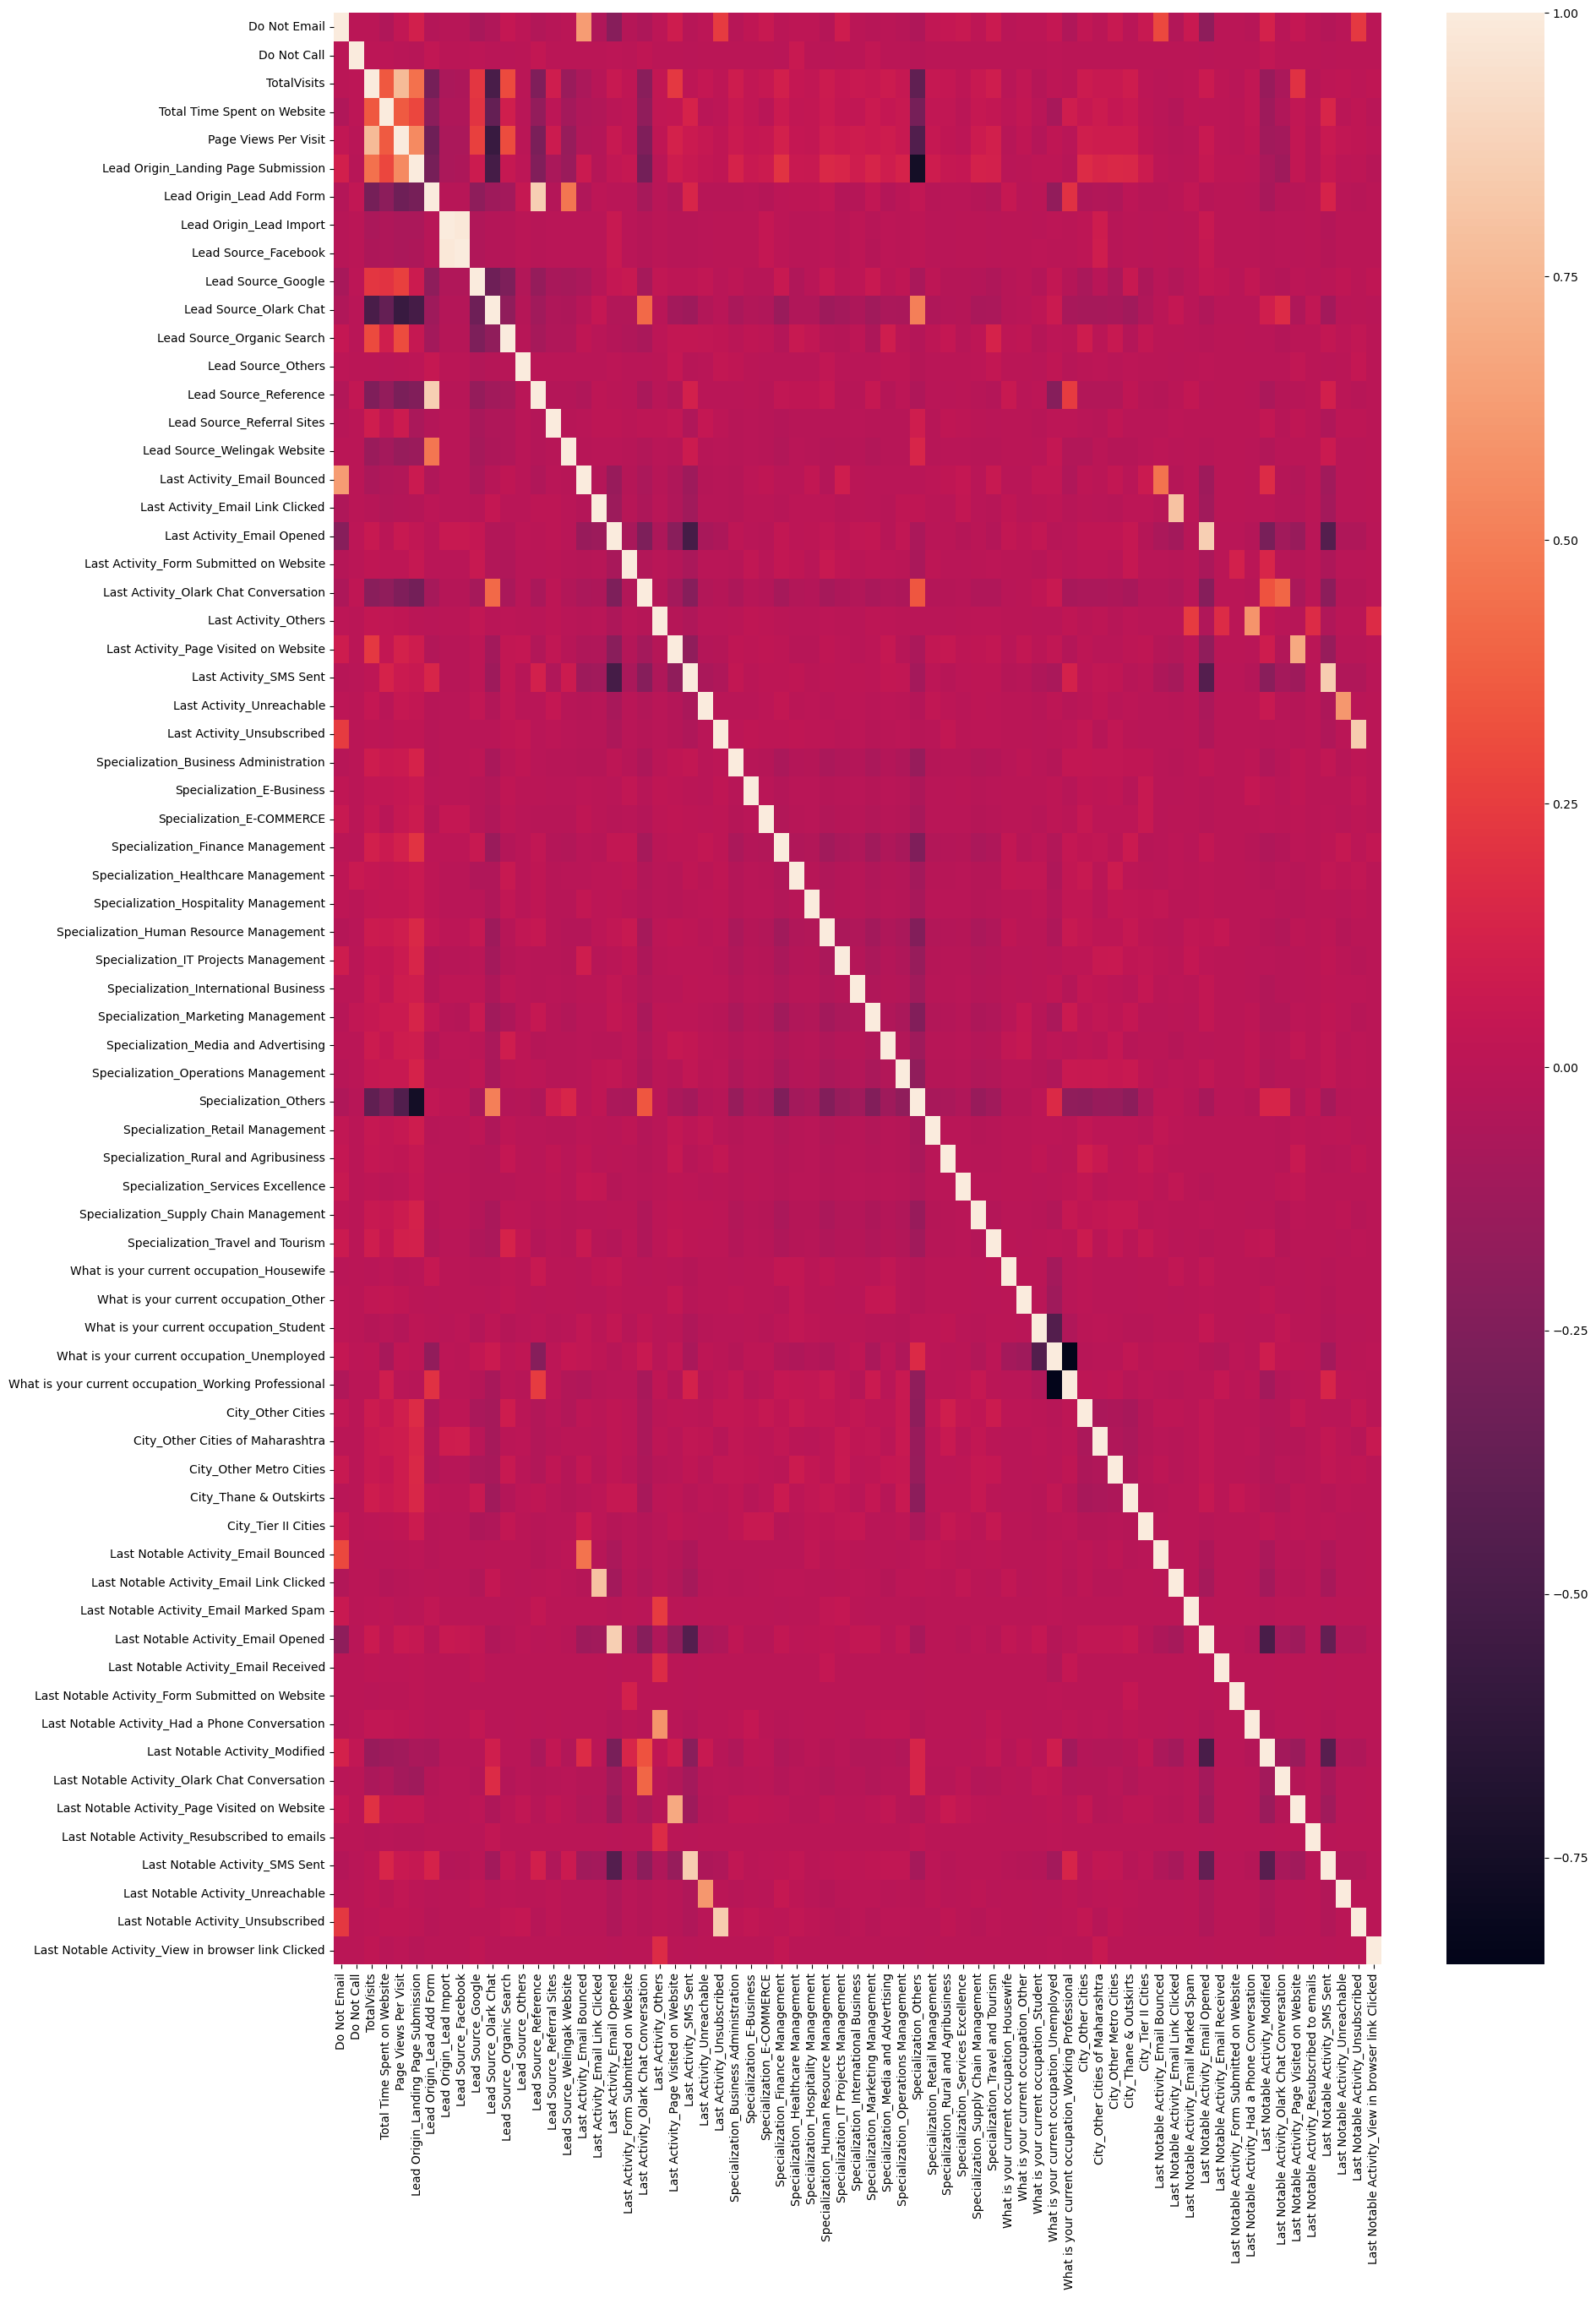

In [57]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

Based on Correlation matrix, it is difficult to drop variables since there are a lot of variables .lets do RFE

### Feature Selection Using RFE

In [58]:
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select =  20)            

In [59]:
rfe = rfe.fit(X_train, y_train)

In [60]:
# List of features selected by RFE: 
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 13),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 25),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 37),
 ('Lead Source_Others', False, 28),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 47),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 21),
 ('Last Activity_Email Link Clicked', False, 16),
 ('Last Activity_Email Opened', False, 9),
 ('Last Activity_Form Submitted on Website', False, 35),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 17),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Acti

In [61]:
# Lets store these selected columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

### Step 7: Model Building

#### Model 1:

In [62]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2581.1
Date:                Mon, 18 Mar 2024   Deviance:                       5162.1
Time:                        12:00:32   Pearson chi2:                 6.51e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4056
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1552      0.167     -6.922      0.000      -1.482      -0.828
Do Not Email                                            -1.6622      0.191     -8.702      0.000      -2.037      -1.288
TotalVisits                                              0.8785      0.190      4.628      0.000       0.506       1.251
Total Time Spent on Website                              4.5156      0.167     27.073      0.000       4.189       4.842
Page Views Per Visit                                    -0.8039      0.200     -4.016      0.000      -1.196      -0.412
Lead Origin_Landing Page Submission                     -1.0859      0.130     -8.359      0.000      -1.341      -0.831
Lead Origin_Lead Add Form                                1.5964      0.913      1.748      0.080      -0.194       3.386
Lead Origin_Lead Import                                  0.8970      0.485      1.848      0.065      -0.055       1.849
Lead Source_Olark Chat                                   1.1120      0.143      7.759      0.000       0.831       1.393
Lead Source_Reference                                    1.7710      0.934      1.895      0.058      -0.060       3.602
Lead Source_Welingak Website                             4.2779      1.162      3.680      0.000       2.000       6.556
Last Activity_Olark Chat Conversation                   -0.9608      0.172     -5.570      0.000      -1.299      -0.623
Last Activity_Others                                     1.8381      0.542      3.390      0.001       0.775       2.901
Last Activity_SMS Sent                                   1.3752      0.076     18.034      0.000       1.226       1.525
Last Activity_Unsubscribed                               1.4020      0.484      2.900      0.004       0.454       2.350
Specialization_Others                                   -1.1382      0.128     -8.917      0.000      -1.388      -0.888
What is your current occupation_Housewife               22.7014   1.53e+04      0.001      0.999   -2.99e+04    2.99e+04
What is your current occupation_Working Professional     2.6336      0.195     13.513      0.000       2.252       3.016
Last Notable Activity_Had a Phone Conversation           1.4884      1.234      1.206      0.228      -0.931       3.908
Last Notable Activity_Modified                          -0.8458      0.082    -10.261      0.000      -1.007      -0.684
Last Notable Activity_Unreachable                        1.5885      0.470      3.383      0.001       0.668       2.509
========================================================================================================================
"""

Amongst all, the Pvalue of 'What is your current occupation_Housewife' is very high i.e 0.999, lets drop this column and see the results in 2nd Model.

In [63]:
col1 = cols.drop('What is your current occupation_Housewife')

#### Model 2:

In [64]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2585.3
Date:                Mon, 18 Mar 2024   Deviance:                       5170.5
Time:                        12:00:32   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4048
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1409      0.167     -6.845      0.000      -1.468      -0.814
Do Not Email                                            -1.6648      0.191     -8.715      0.000      -2.039      -1.290
TotalVisits                                              0.8727      0.190      4.601      0.000       0.501       1.245
Total Time Spent on Website                              4.5128      0.167     27.086      0.000       4.186       4.839
Page Views Per Visit                                    -0.8106      0.200     -4.052      0.000      -1.203      -0.418
Lead Origin_Landing Page Submission                     -1.0857      0.130     -8.365      0.000      -1.340      -0.831
Lead Origin_Lead Add Form                                1.5889      0.913      1.741      0.082      -0.200       3.378
Lead Origin_Lead Import                                  0.8878      0.485      1.829      0.067      -0.064       1.839
Lead Source_Olark Chat                                   1.1059      0.143      7.723      0.000       0.825       1.387
Lead Source_Reference                                    1.7893      0.934      1.916      0.055      -0.041       3.620
Lead Source_Welingak Website                             4.2806      1.162      3.683      0.000       2.003       6.558
Last Activity_Olark Chat Conversation                   -0.9614      0.172     -5.574      0.000      -1.299      -0.623
Last Activity_Others                                     1.8376      0.542      3.387      0.001       0.774       2.901
Last Activity_SMS Sent                                   1.3700      0.076     17.977      0.000       1.221       1.519
Last Activity_Unsubscribed                               1.3997      0.483      2.895      0.004       0.452       2.347
Specialization_Others                                   -1.1440      0.128     -8.967      0.000      -1.394      -0.894
What is your current occupation_Working Professional     2.6289      0.195     13.489      0.000       2.247       3.011
Last Notable Activity_Had a Phone Conversation           1.4820      1.235      1.200      0.230      -0.938       3.902
Last Notable Activity_Modified                          -0.8494      0.082    -10.312      0.000      -1.011      -0.688
Last Notable Activity_Unreachable                        1.5830      0.470      3.371      0.001       0.663       2.503
========================================================================================================================
"""

The second most highest p-value of 0.230 is for Last Notable Activity_Had a Phone Conversation, lets drop it and see result in 3rd model.

In [65]:
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

#### Model 3:

In [66]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2586.1
Date:                Mon, 18 Mar 2024   Deviance:                       5172.2
Time:                        12:00:32   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4047
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1349      0.167     -6.813      0.000      -1.461      -0.808
Do Not Email                                            -1.6672      0.191     -8.718      0.000      -2.042      -1.292
TotalVisits                                              0.8686      0.190      4.583      0.000       0.497       1.240
Total Time Spent on Website                              4.5086      0.167     27.072      0.000       4.182       4.835
Page Views Per Visit                                    -0.8092      0.200     -4.048      0.000      -1.201      -0.417
Lead Origin_Landing Page Submission                     -1.0858      0.130     -8.367      0.000      -1.340      -0.831
Lead Origin_Lead Add Form                                1.5874      0.913      1.739      0.082      -0.202       3.377
Lead Origin_Lead Import                                  0.8855      0.486      1.824      0.068      -0.066       1.837
Lead Source_Olark Chat                                   1.1025      0.143      7.700      0.000       0.822       1.383
Lead Source_Reference                                    1.7885      0.934      1.915      0.055      -0.042       3.619
Lead Source_Welingak Website                             4.2829      1.162      3.685      0.000       2.005       6.561
Last Activity_Olark Chat Conversation                   -0.9560      0.172     -5.544      0.000      -1.294      -0.618
Last Activity_Others                                     2.2111      0.469      4.718      0.000       1.293       3.130
Last Activity_SMS Sent                                   1.3693      0.076     17.971      0.000       1.220       1.519
Last Activity_Unsubscribed                               1.4012      0.483      2.898      0.004       0.454       2.349
Specialization_Others                                   -1.1481      0.128     -8.999      0.000      -1.398      -0.898
What is your current occupation_Working Professional     2.6248      0.195     13.474      0.000       2.243       3.007
Last Notable Activity_Modified                          -0.8562      0.082    -10.410      0.000      -1.017      -0.695
Last Notable Activity_Unreachable                        1.5805      0.470      3.366      0.001       0.660       2.501
========================================================================================================================
"""

Now the highest p-value of 0.082 is for Lead Origin_Lead Add Form, lets drop it and see result in 4th model.

In [67]:
col1 = col1.drop('Lead Origin_Lead Add Form')

#### Model 4:

In [68]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2587.8
Date:                Mon, 18 Mar 2024   Deviance:                       5175.6
Time:                        12:00:32   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4044
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1021      0.166     -6.657      0.000      -1.427      -0.778
Do Not Email                                            -1.6694      0.191     -8.730      0.000      -2.044      -1.295
TotalVisits                                              0.8583      0.189      4.531      0.000       0.487       1.229
Total Time Spent on Website                              4.5011      0.166     27.069      0.000       4.175       4.827
Page Views Per Visit                                    -0.8215      0.200     -4.111      0.000      -1.213      -0.430
Lead Origin_Landing Page Submission                     -1.1041      0.129     -8.527      0.000      -1.358      -0.850
Lead Origin_Lead Import                                  0.8600      0.486      1.771      0.077      -0.092       1.812
Lead Source_Olark Chat                                   1.0872      0.143      7.622      0.000       0.808       1.367
Lead Source_Reference                                    3.3513      0.255     13.141      0.000       2.851       3.851
Lead Source_Welingak Website                             5.8524      0.733      7.985      0.000       4.416       7.289
Last Activity_Olark Chat Conversation                   -0.9599      0.172     -5.568      0.000      -1.298      -0.622
Last Activity_Others                                     2.2096      0.469      4.714      0.000       1.291       3.128
Last Activity_SMS Sent                                   1.3695      0.076     17.976      0.000       1.220       1.519
Last Activity_Unsubscribed                               1.4005      0.483      2.898      0.004       0.453       2.348
Specialization_Others                                   -1.1622      0.127     -9.121      0.000      -1.412      -0.912
What is your current occupation_Working Professional     2.6216      0.195     13.456      0.000       2.240       3.003
Last Notable Activity_Modified                          -0.8577      0.082    -10.434      0.000      -1.019      -0.697
Last Notable Activity_Unreachable                        1.5769      0.470      3.359      0.001       0.657       2.497
========================================================================================================================
"""

Now the highest p-value of 0.077 is for Lead Origin_Lead Import, lets drop it and see result in 5th model.

In [69]:
col1 = col1.drop('Lead Origin_Lead Import')

#### Model 5:

In [70]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2589.2
Date:                Mon, 18 Mar 2024   Deviance:                       5178.5
Time:                        12:00:32   Pearson chi2:                 6.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4041
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0362      0.161     -6.427      0.000      -1.352      -0.720
Do Not Email                                            -1.6720      0.191     -8.746      0.000      -2.047      -1.297
TotalVisits                                              0.8397      0.189      4.445      0.000       0.469       1.210
Total Time Spent on Website                              4.4742      0.165     27.069      0.000       4.150       4.798
Page Views Per Visit                                    -0.8473      0.199     -4.253      0.000      -1.238      -0.457
Lead Origin_Landing Page Submission                     -1.1372      0.128     -8.861      0.000      -1.389      -0.886
Lead Source_Olark Chat                                   1.0460      0.140      7.445      0.000       0.771       1.321
Lead Source_Reference                                    3.3002      0.253     13.030      0.000       2.804       3.797
Lead Source_Welingak Website                             5.8129      0.733      7.935      0.000       4.377       7.249
Last Activity_Olark Chat Conversation                   -0.9634      0.172     -5.590      0.000      -1.301      -0.626
Last Activity_Others                                     2.2060      0.469      4.708      0.000       1.288       3.124
Last Activity_SMS Sent                                   1.3673      0.076     17.957      0.000       1.218       1.517
Last Activity_Unsubscribed                               1.3985      0.483      2.897      0.004       0.452       2.345
Specialization_Others                                   -1.1868      0.127     -9.344      0.000      -1.436      -0.938
What is your current occupation_Working Professional     2.6213      0.195     13.464      0.000       2.240       3.003
Last Notable Activity_Modified                          -0.8600      0.082    -10.466      0.000      -1.021      -0.699
Last Notable Activity_Unreachable                        1.5692      0.469      3.343      0.001       0.649       2.489
========================================================================================================================
"""

#### Checking for VIF values:

In [71]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,7.64
1,TotalVisits,5.73
4,Lead Origin_Landing Page Submission,3.94
12,Specialization_Others,2.68
2,Total Time Spent on Website,2.17
5,Lead Source_Olark Chat,2.09
14,Last Notable Activity_Modified,1.79
10,Last Activity_SMS Sent,1.62
8,Last Activity_Olark Chat Conversation,1.59
0,Do Not Email,1.21


In [72]:
# Dropping the column  'Page Views Per Visit' because it has high VIF of 7.64 & see our 6th model
col1 = col1.drop('Page Views Per Visit')

#### Model 6:

In [73]:
X_train_sm = sm.add_constant(X_train[col1])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2598.4
Date:                Mon, 18 Mar 2024   Deviance:                       5196.7
Time:                        12:00:33   Pearson chi2:                 6.51e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4024
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2335      0.155     -7.966      0.000      -1.537      -0.930
Do Not Email                                            -1.6704      0.191     -8.749      0.000      -2.045      -1.296
TotalVisits                                              0.3980      0.159      2.511      0.012       0.087       0.709
Total Time Spent on Website                              4.4642      0.165     27.045      0.000       4.141       4.788
Lead Origin_Landing Page Submission                     -1.1831      0.128     -9.262      0.000      -1.433      -0.933
Lead Source_Olark Chat                                   1.2252      0.134      9.116      0.000       0.962       1.489
Lead Source_Reference                                    3.4920      0.249     14.001      0.000       3.003       3.981
Lead Source_Welingak Website                             5.9938      0.731      8.195      0.000       4.560       7.427
Last Activity_Olark Chat Conversation                   -0.9643      0.172     -5.607      0.000      -1.301      -0.627
Last Activity_Others                                     2.1586      0.463      4.664      0.000       1.252       3.066
Last Activity_SMS Sent                                   1.3341      0.075     17.675      0.000       1.186       1.482
Last Activity_Unsubscribed                               1.3723      0.482      2.848      0.004       0.428       2.317
Specialization_Others                                   -1.1597      0.127     -9.162      0.000      -1.408      -0.912
What is your current occupation_Working Professional     2.6140      0.195     13.404      0.000       2.232       2.996
Last Notable Activity_Modified                          -0.8576      0.082    -10.460      0.000      -1.018      -0.697
Last Notable Activity_Unreachable                        1.5347      0.473      3.245      0.001       0.608       2.462
========================================================================================================================
"""

In [74]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,3.31
1,TotalVisits,3.08
11,Specialization_Others,2.57
2,Total Time Spent on Website,2.15
4,Lead Source_Olark Chat,2.02
13,Last Notable Activity_Modified,1.78
9,Last Activity_SMS Sent,1.60
7,Last Activity_Olark Chat Conversation,1.59
0,Do Not Email,1.21
12,What is your current occupation_Working Profes...,1.21


All the VIF values are good (below 5) and all the p-values are below 0.05. But model 6 is still not a light model since it has 15 variables. lets drop 3 more variables which are not much significant as per data dictionary.

In [75]:
# Dropping the column Last Activity_Others and see model 7
col1 = col1.drop('Last Activity_Others')

#### Model 7:

In [76]:
X_train_sm = sm.add_constant(X_train[col1])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.5
Date:                Mon, 18 Mar 2024   Deviance:                       5221.1
Time:                        12:00:33   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4001
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2214      0.154     -7.914      0.000      -1.524      -0.919
Do Not Email                                            -1.6541      0.189     -8.766      0.000      -2.024      -1.284
TotalVisits                                              0.4243      0.158      2.685      0.007       0.115       0.734
Total Time Spent on Website                              4.4595      0.165     27.102      0.000       4.137       4.782
Lead Origin_Landing Page Submission                     -1.1889      0.127     -9.328      0.000      -1.439      -0.939
Lead Source_Olark Chat                                   1.2315      0.134      9.184      0.000       0.969       1.494
Lead Source_Reference                                    3.4951      0.249     14.019      0.000       3.006       3.984
Lead Source_Welingak Website                             5.9822      0.731      8.183      0.000       4.549       7.415
Last Activity_Olark Chat Conversation                   -0.9974      0.172     -5.806      0.000      -1.334      -0.661
Last Activity_SMS Sent                                   1.3116      0.075     17.447      0.000       1.164       1.459
Last Activity_Unsubscribed                               1.3351      0.481      2.776      0.006       0.392       2.278
Specialization_Others                                   -1.1600      0.126     -9.179      0.000      -1.408      -0.912
What is your current occupation_Working Professional     2.6257      0.195     13.432      0.000       2.243       3.009
Last Notable Activity_Modified                          -0.8388      0.082    -10.284      0.000      -0.999      -0.679
Last Notable Activity_Unreachable                        1.5143      0.473      3.202      0.001       0.588       2.441
========================================================================================================================
"""

In [77]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,3.31
1,TotalVisits,3.07
10,Specialization_Others,2.57
2,Total Time Spent on Website,2.15
4,Lead Source_Olark Chat,2.02
12,Last Notable Activity_Modified,1.78
7,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.59
0,Do Not Email,1.21
11,What is your current occupation_Working Profes...,1.21


Now the p-value for Last Activity_Unsubscribed is 0.006 and to make model lighter lets drop it.

In [78]:
# Dropping the column Last Activity_Unsubscribed and see model 8
col1 = col1.drop('Last Activity_Unsubscribed')

#### Model 8:

In [79]:
X_train_sm = sm.add_constant(X_train[col1])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2614.0
Date:                Mon, 18 Mar 2024   Deviance:                       5227.9
Time:                        12:00:33   Pearson chi2:                 6.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3994
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2135      0.154     -7.863      0.000      -1.516      -0.911
Do Not Email                                            -1.5013      0.175     -8.575      0.000      -1.844      -1.158
TotalVisits                                              0.4249      0.158      2.691      0.007       0.115       0.734
Total Time Spent on Website                              4.4642      0.164     27.143      0.000       4.142       4.787
Lead Origin_Landing Page Submission                     -1.1914      0.127     -9.347      0.000      -1.441      -0.942
Lead Source_Olark Chat                                   1.2327      0.134      9.194      0.000       0.970       1.496
Lead Source_Reference                                    3.4831      0.249     13.995      0.000       2.995       3.971
Lead Source_Welingak Website                             5.9500      0.730      8.151      0.000       4.519       7.381
Last Activity_Olark Chat Conversation                   -1.0030      0.172     -5.841      0.000      -1.340      -0.666
Last Activity_SMS Sent                                   1.2968      0.075     17.325      0.000       1.150       1.443
Specialization_Others                                   -1.1606      0.126     -9.188      0.000      -1.408      -0.913
What is your current occupation_Working Professional     2.6270      0.195     13.476      0.000       2.245       3.009
Last Notable Activity_Modified                          -0.8454      0.081    -10.375      0.000      -1.005      -0.686
Last Notable Activity_Unreachable                        1.5042      0.472      3.185      0.001       0.579       2.430
========================================================================================================================
"""

In [80]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,3.31
1,TotalVisits,3.07
9,Specialization_Others,2.57
2,Total Time Spent on Website,2.15
4,Lead Source_Olark Chat,2.02
11,Last Notable Activity_Modified,1.78
7,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.59
10,What is your current occupation_Working Profes...,1.21
5,Lead Source_Reference,1.19


Let drop Last Notable Activity_Unreachable and see the next model

In [81]:
# Dropping the column Last Activity_Unsubscribed and see model 8
col1 = col1.drop("Last Notable Activity_Unreachable")

#### Model 9:

In [82]:
X_train_sm = sm.add_constant(X_train[col1])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2619.2
Date:                Mon, 18 Mar 2024   Deviance:                       5238.4
Time:                        12:00:34   Pearson chi2:                 6.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3984
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1889      0.154     -7.723      0.000      -1.491      -0.887
Do Not Email                                            -1.5043      0.175     -8.593      0.000      -1.847      -1.161
TotalVisits                                              0.4279      0.158      2.712      0.007       0.119       0.737
Total Time Spent on Website                              4.4509      0.164     27.117      0.000       4.129       4.773
Lead Origin_Landing Page Submission                     -1.1956      0.127     -9.390      0.000      -1.445      -0.946
Lead Source_Olark Chat                                   1.2238      0.134      9.141      0.000       0.961       1.486
Lead Source_Reference                                    3.4729      0.249     13.963      0.000       2.985       3.960
Lead Source_Welingak Website                             5.9387      0.730      8.136      0.000       4.508       7.369
Last Activity_Olark Chat Conversation                   -1.0096      0.172     -5.881      0.000      -1.346      -0.673
Last Activity_SMS Sent                                   1.2820      0.075     17.178      0.000       1.136       1.428
Specialization_Others                                   -1.1633      0.126     -9.217      0.000      -1.411      -0.916
What is your current occupation_Working Professional     2.6280      0.195     13.496      0.000       2.246       3.010
Last Notable Activity_Modified                          -0.8570      0.081    -10.536      0.000      -1.016      -0.698
========================================================================================================================
"""

In [83]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,3.30
1,TotalVisits,3.07
9,Specialization_Others,2.57
2,Total Time Spent on Website,2.15
4,Lead Source_Olark Chat,2.02
11,Last Notable Activity_Modified,1.78
7,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.58
10,What is your current occupation_Working Profes...,1.21
5,Lead Source_Reference,1.19


All the VIF values are good (below 5) and all the p-values are below 0.05. So we can fix model 9 as final  which has 12 variables, for further prediction

### Step 8: Making Prediction on the Train set:

In [84]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.181661
1012    0.123627
9226    0.331076
4750    0.850996
7987    0.805614
1281    0.738118
2880    0.095509
4971    0.968809
7536    0.856249
1248    0.753882
dtype: float64

In [85]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18166106, 0.12362721, 0.3310763 , 0.85099619, 0.80561405,
       0.7381185 , 0.09550903, 0.96880911, 0.85624914, 0.75388178])

Creating a dataframe with the actual Converted flag and the predicted probabilities

In [86]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_prob
0,0,0.181661
1,0,0.123627
2,0,0.331076
3,1,0.850996
4,1,0.805614


In [87]:
# Lets take an arbitrary cut-off probability point of 0.5 to find the predicted labels
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

In [88]:
y_train_pred_final.head()

,Converted,Converted_prob,predicted
0,0,0.181661,0
1,0,0.123627,0
2,0,0.331076,0
3,1,0.850996,1
4,1,0.805614,1


#### Confusion matrix:

In [89]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3466  439]
 [ 721 1725]]


In [90]:
# Let's now check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.817351598173516


In [91]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [92]:
# Sensitivity of our LR model:
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.705233033524121


In [93]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8875800256081946


In [94]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.11241997439180537


In [95]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7971349353049908


In [96]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8278003343682828


From above metrics, We got that specificity was good (~88%) but our sensitivity was only 70%. Hence, this needed to be taken care of. But this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.

### ROC to optimise the Cut-off:

In [97]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [98]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

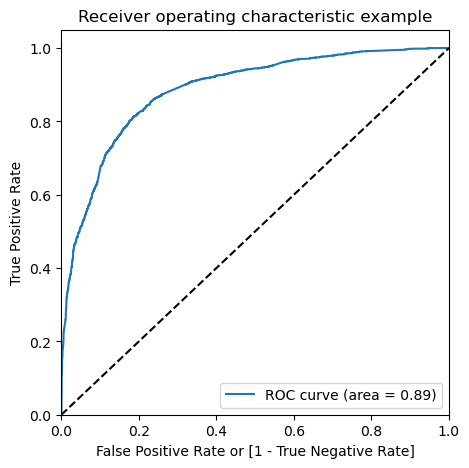

In [99]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

ROC gave us us (0.89) AUC (area under curve), therefore our model is a pretty good one.

#### Finding Optimal Cutoff Point:

In [100]:
# Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [101]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.181661,0,1,1,0,0,0,0,0,0,0,0
1,0,0.123627,0,1,1,0,0,0,0,0,0,0,0
2,0,0.331076,0,1,1,1,1,0,0,0,0,0,0
3,1,0.850996,1,1,1,1,1,1,1,1,1,1,0
4,1,0.805614,1,1,1,1,1,1,1,1,1,1,0


In [102]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.589041  0.973426  0.348271
0.2   0.2  0.743505  0.916190  0.635339
0.3   0.3  0.801291  0.848733  0.771575
0.4   0.4  0.816407  0.772281  0.844046
0.5   0.5  0.817352  0.705233  0.887580
0.6   0.6  0.796410  0.597711  0.920871
0.7   0.7  0.783341  0.524939  0.945198
0.8   0.8  0.759723  0.422322  0.971063
0.9   0.9  0.719257  0.290270  0.987964


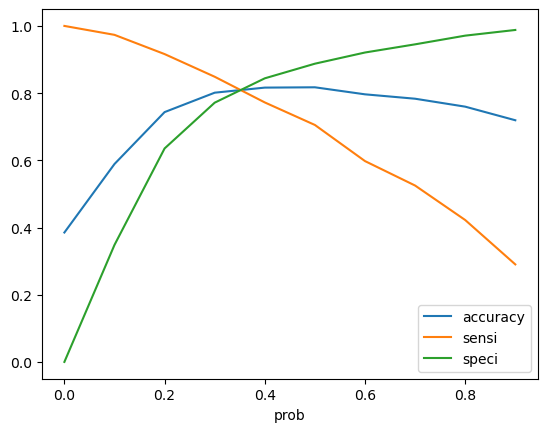

In [103]:
# Let's plot accuracy sensitivity and specificity for various probabilities and check the point of intersection:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.34 is the optimum point to take it as a cutoff probability.

In [104]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.181661,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.123627,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.331076,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.850996,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.805614,1,1,1,1,1,1,1,1,1,1,0,1


Now the main task, of assigning Lead Score to the Training data:

In [105]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.181661,0,1,1,0,0,0,0,0,0,0,0,0,18
1,0,0.123627,0,1,1,0,0,0,0,0,0,0,0,0,12
2,0,0.331076,0,1,1,1,1,0,0,0,0,0,0,0,33
3,1,0.850996,1,1,1,1,1,1,1,1,1,1,0,1,85
4,1,0.805614,1,1,1,1,1,1,1,1,1,1,0,1,81


### Step 9: Model Evaluation

In [106]:
# Verification of metrics: 
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8110533774208786


In [107]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3152,  753],
       [ 447, 1999]], dtype=int64)

In [108]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [109]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8172526573998364


With the optimal cut-off, senstivity has improved from 70% to ~82% 

In [110]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [111]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8875800256081946


In [112]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.11241997439180537


In [113]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7971349353049908


In [114]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8278003343682828


#### Precision and Recall:

In [115]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7971349353049908


In [116]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.705233033524121


### Step 10: Making predictions on the test set:

In [117]:
#Scaling the test dataset:
X_test[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits','Page Views Per Visit',
                                                                                                        'Total Time Spent on Website']])

In [118]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Modified
3271,0,0.4,0.070530,0,0,0,0,0,0,1,0,0
1490,0,0.5,0.679695,1,0,0,0,0,0,0,1,0
7936,0,0.2,0.033243,0,0,0,0,0,0,1,0,0
4216,0,0.0,0.000000,0,0,1,0,0,0,0,0,1
3830,0,0.8,0.073675,1,0,0,0,0,0,0,0,0


In [119]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.133877
1490    0.970193
7936    0.107297
4216    0.806443
3830    0.152611
1800    0.657514
6507    0.328238
4821    0.281856
4223    0.917039
4714    0.331076
dtype: float64

In [120]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.133877
1490,0.970193
7936,0.107297
4216,0.806443
3830,0.152611


In [121]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [122]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [123]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [124]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.133877
1,1,1490,0.970193
2,0,7936,0.107297
3,1,4216,0.806443
4,0,3830,0.152611


In [125]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [126]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.133877
1,1490,1,0.970193
2,7936,0,0.107297
3,4216,1,0.806443
4,3830,0,0.152611


In [127]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [128]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.133877,0
1,1490,1,0.970193,1
2,7936,0,0.107297,0
3,4216,1,0.806443,1
4,3830,0,0.152611,0


In [129]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8020565552699229


In [130]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1394,  340],
       [ 199,  790]], dtype=int64)

In [131]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [132]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.7987866531850354


In [133]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.803921568627451


#### Assigning Lead Score to the Testing data:

In [134]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.133877,0,13
1,1490,1,0.970193,1,97
2,7936,0,0.107297,0,11
3,4216,1,0.806443,1,81
4,3830,0,0.152611,0,15


### Observations:
After running the model on the Test Data , we obtain:

- Accuracy : 80.2 %
- Sensitivity : 79.9 %
- Specificity : 80.4 %

### Results :
1) Comparing the values obtained for Train & Test:

** Train Data:
- Accuracy : 81.1 %
- Sensitivity : 81.7%
- Specificity : 80.7 %

** Test Data:
- Accuracy : 80.2 %
- Sensitivity : 79.9 %
- Specificity : 80.4 %

As per CEO's ballpark target of lead conversion rate to be around 80%, our Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%

2) Finding out the leads which should be contacted: The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'. Below mentioned are hot leads prospects:

In [135]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,1490,1,0.970193,1,97
8,4223,1,0.917039,1,92
16,1946,1,0.942295,1,94
21,2461,1,0.992374,1,99
23,5822,1,0.997963,1,100
...,...,...,...,...,...
2694,1566,1,0.959021,1,96
2699,6461,1,0.956893,1,96
2703,5741,1,0.918870,1,92
2715,6299,1,0.867788,1,87


3) Finding out the Important Features from our final model:

In [136]:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                            5.938665
Total Time Spent on Website                             4.450924
Lead Source_Reference                                   3.472932
What is your current occupation_Working Professional    2.628046
Last Activity_SMS Sent                                  1.282045
Lead Source_Olark Chat                                  1.223787
TotalVisits                                             0.427926
Last Notable Activity_Modified                         -0.856956
Last Activity_Olark Chat Conversation                  -1.009575
Specialization_Others                                  -1.163282
const                                                  -1.188916
Lead Origin_Landing Page Submission                    -1.195612
Do Not Email                                           -1.504251
dtype: float64